In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# If you're on Windows, you can use raw string (r"") to avoid escape character issues
path = r"..\\results\\prometheus_data\\service-2-deployment_dataset.csv"

# Read the CSV into a DataFrame
df = pd.read_csv(path)

print(df.columns)

# Convert the Timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')



Index(['Timestamp', 'Service', 'CPU Request', 'Memory Request', 'CPU Limit',
       'Memory Limit', 'Latency', 'CPU Usage', 'Memory Usage'],
      dtype='object')


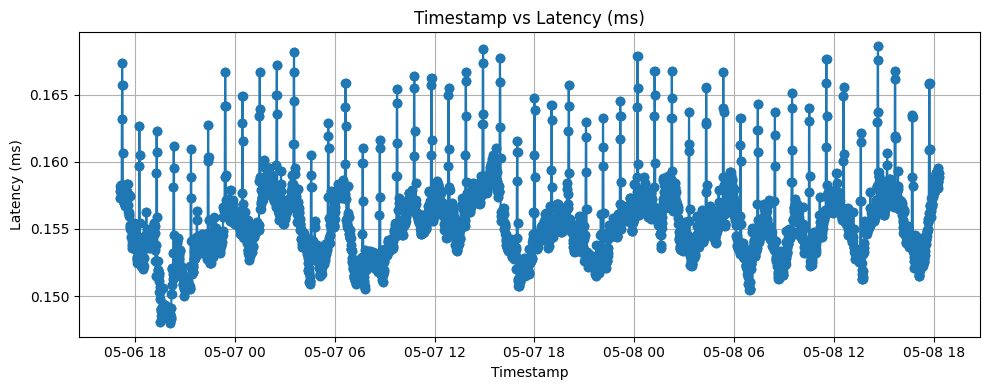

In [2]:
# Plot 1: Timestamp vs Latency (ms)
plt.figure(figsize=(10, 4))
plt.plot(df['Timestamp'], df['Latency'] * 1000, marker='o')
plt.title("Timestamp vs Latency (ms)")
plt.xlabel("Timestamp")
plt.ylabel("Latency (ms)")
plt.grid(True)
plt.tight_layout()
plt.show()

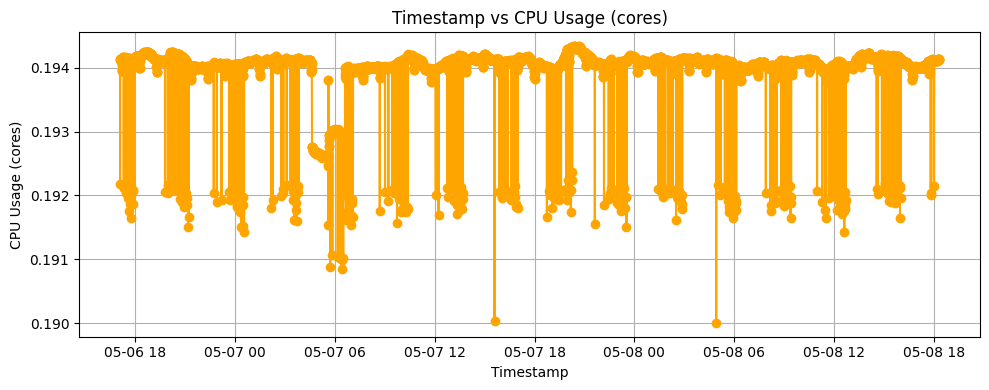

In [3]:
# Plot 2: Timestamp vs CPU Usage
plt.figure(figsize=(10, 4))
plt.plot(df['Timestamp'], df['CPU Usage'], marker='o', color='orange')
plt.title("Timestamp vs CPU Usage (cores)")
plt.xlabel("Timestamp")
plt.ylabel("CPU Usage (cores)")
plt.grid(True)
plt.tight_layout()
plt.show()

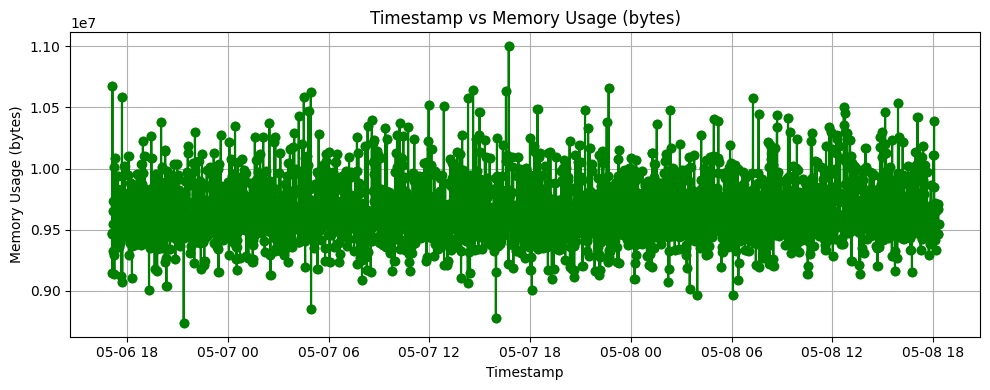

In [4]:
# Plot 3: Timestamp vs Memory Usage
plt.figure(figsize=(10, 4))
plt.plot(df['Timestamp'], df['Memory Usage'], marker='o', color='green')
plt.title("Timestamp vs Memory Usage (bytes)")
plt.xlabel("Timestamp")
plt.ylabel("Memory Usage (bytes)")
plt.grid(True)
plt.tight_layout()
plt.show()

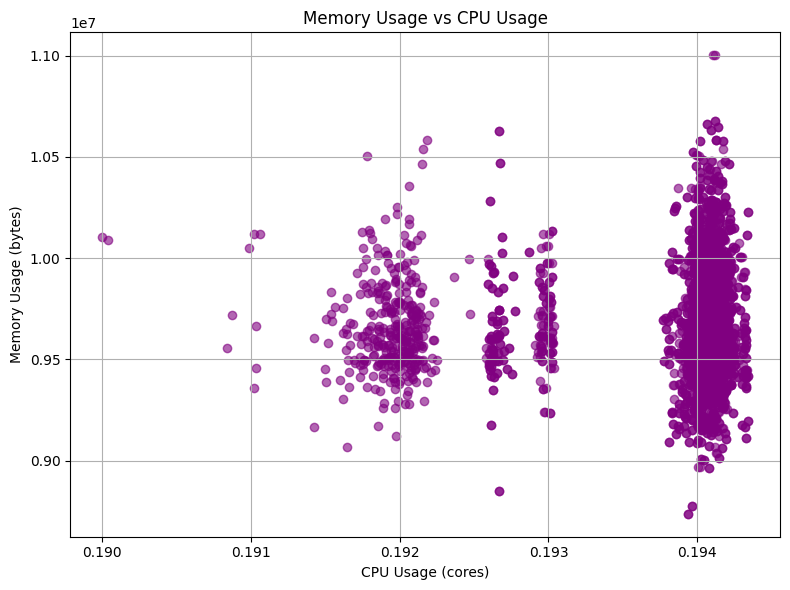

In [5]:
# Plot: Memory Usage vs CPU Usage
plt.figure(figsize=(8, 6))
plt.scatter(df['CPU Usage'], df['Memory Usage'], alpha=0.6, color='purple')
plt.title("Memory Usage vs CPU Usage")
plt.xlabel("CPU Usage (cores)")
plt.ylabel("Memory Usage (bytes)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# Calculate CPU Usage Percentage
df['CPU_Usage_Percentage'] = (df['CPU Usage'] / df['CPU Limit']) * 100

# Calculate Memory Usage Percentage
df['Memory_Usage_Percentage'] = (df['Memory Usage'] / df['Memory Limit']) * 100

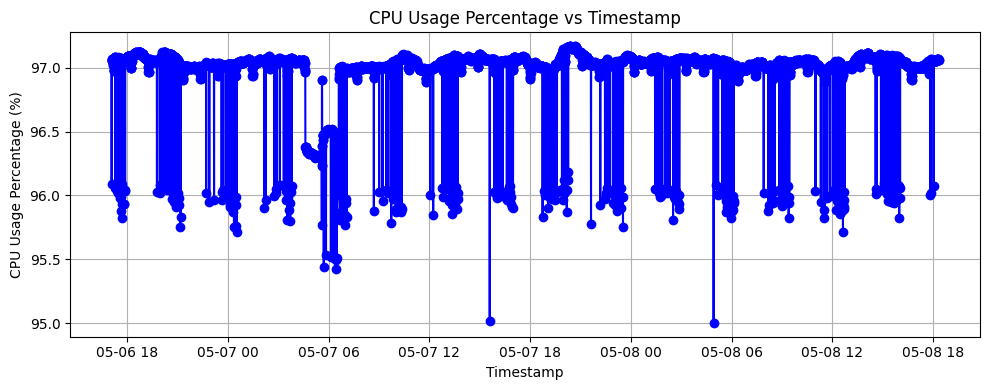

In [7]:
# Plot: CPU Usage Percentage vs Timestamp
plt.figure(figsize=(10, 4))
plt.plot(df['Timestamp'], df['CPU_Usage_Percentage'], marker='o', color='blue')
plt.title("CPU Usage Percentage vs Timestamp")
plt.xlabel("Timestamp")
plt.ylabel("CPU Usage Percentage (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

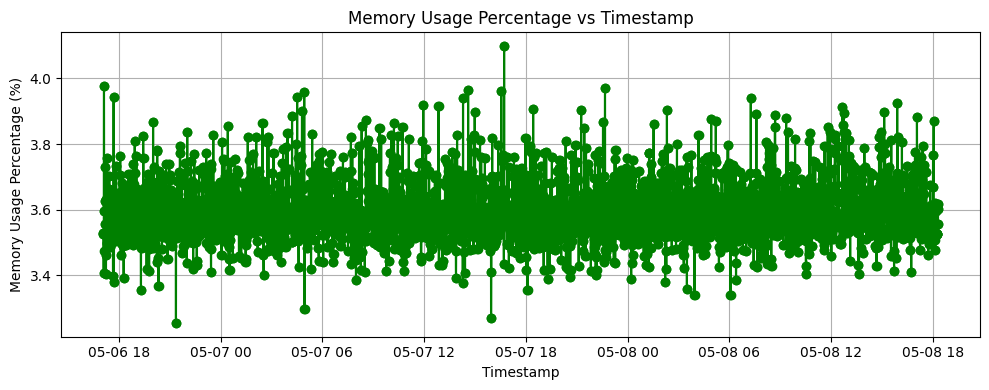

In [8]:
# Plot: Memory Usage Percentage vs Timestamp
plt.figure(figsize=(10, 4))
plt.plot(df['Timestamp'], df['Memory_Usage_Percentage'], marker='o', color='green')
plt.title("Memory Usage Percentage vs Timestamp")
plt.xlabel("Timestamp")
plt.ylabel("Memory Usage Percentage (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

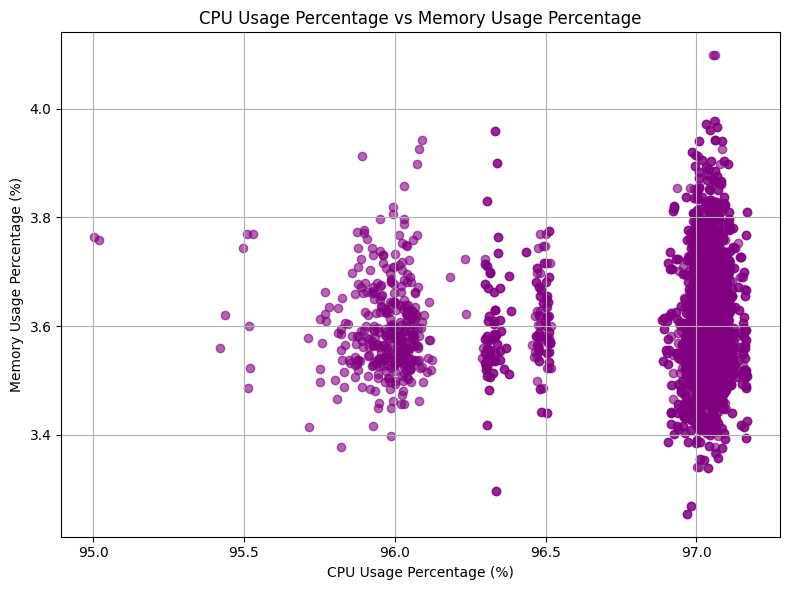

In [9]:
# Plot: CPU Usage Percentage vs Memory Usage Percentage
plt.figure(figsize=(8, 6))
plt.scatter(df['CPU_Usage_Percentage'], df['Memory_Usage_Percentage'], alpha=0.6, color='purple')
plt.title("CPU Usage Percentage vs Memory Usage Percentage")
plt.xlabel("CPU Usage Percentage (%)")
plt.ylabel("Memory Usage Percentage (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

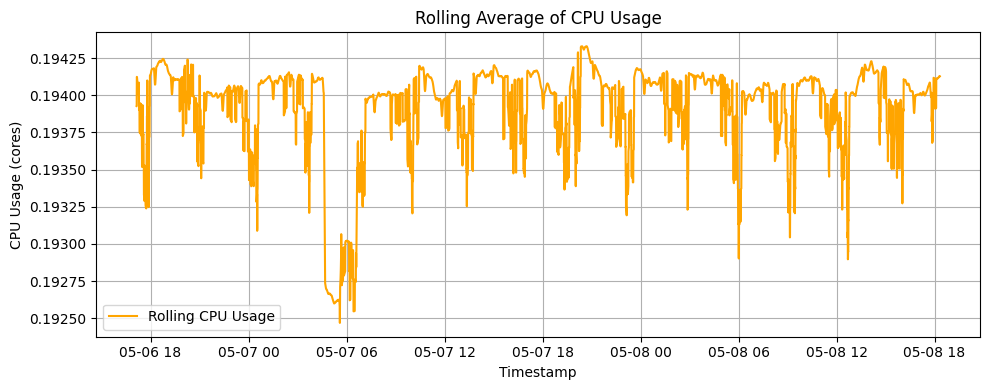

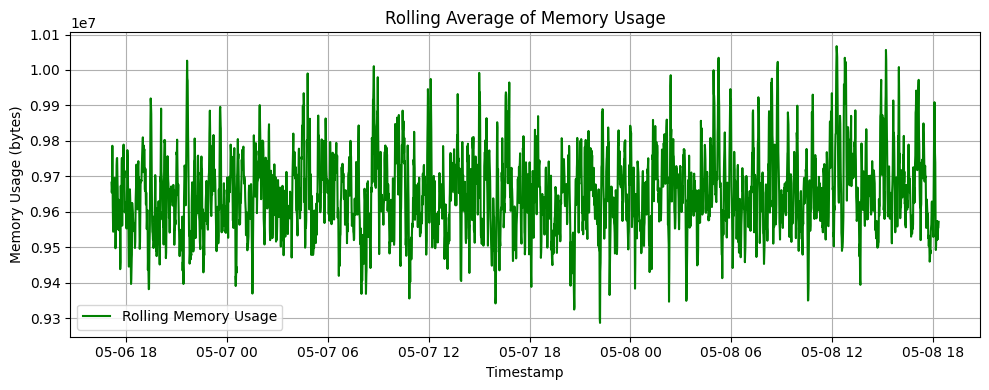

In [10]:
df['Rolling_CPU_Usage'] = df['CPU Usage'].rolling(window=10).mean()
df['Rolling_Memory_Usage'] = df['Memory Usage'].rolling(window=10).mean()

# Plot rolling averages
plt.figure(figsize=(10, 4))
plt.plot(df['Timestamp'], df['Rolling_CPU_Usage'], color='orange', label='Rolling CPU Usage')
plt.title("Rolling Average of CPU Usage")
plt.xlabel("Timestamp")
plt.ylabel("CPU Usage (cores)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(df['Timestamp'], df['Rolling_Memory_Usage'], color='green', label='Rolling Memory Usage')
plt.title("Rolling Average of Memory Usage")
plt.xlabel("Timestamp")
plt.ylabel("Memory Usage (bytes)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


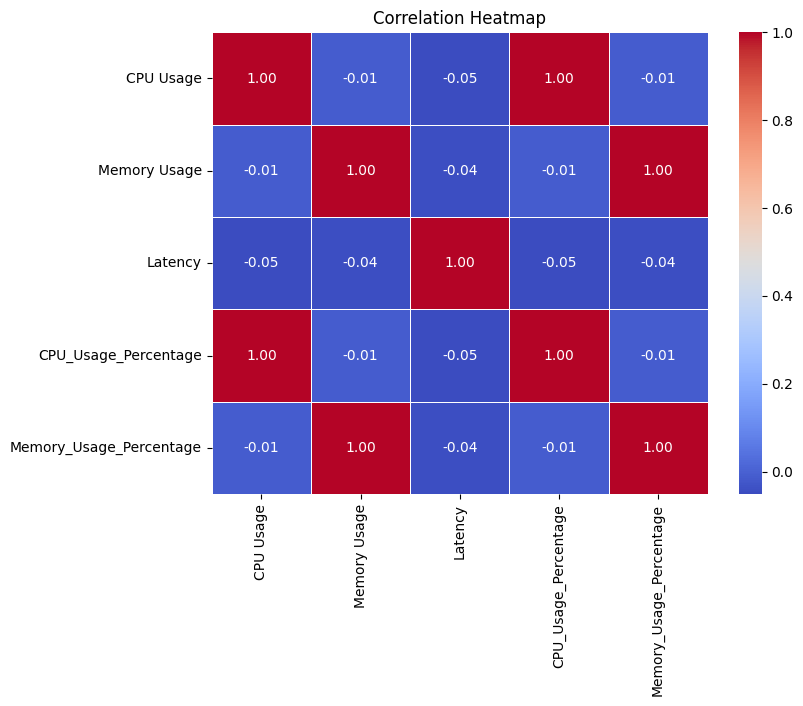

In [11]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df[['CPU Usage', 'Memory Usage', 'Latency', 'CPU_Usage_Percentage', 'Memory_Usage_Percentage']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
